import librarynya

In [236]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
data = pd.read_csv("survey lung cancer.csv")
df = pd.DataFrame(data)

In [238]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Ini exploratory data analysisnya (dibawah)

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [240]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [241]:
#intinya gua ganti jd numerical semua

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [242]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [243]:
print ('Total Pasien belum terkena kanker : {} '.format(data.LUNG_CANCER.value_counts()[0]))
print ('Total pasien yang terkena kanker : {} '.format(data.LUNG_CANCER.value_counts()[1]))

Total Pasien belum terkena kanker : 39 
Total pasien yang terkena kanker : 270 


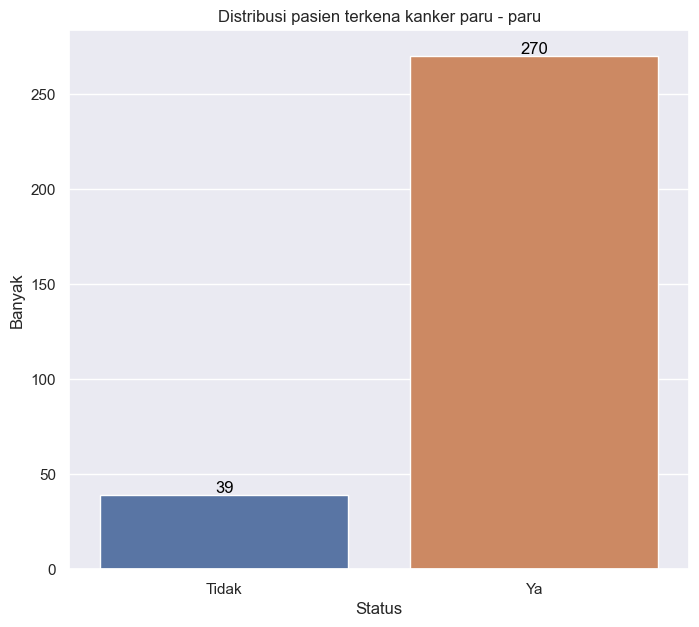

In [244]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 7))
sns.countplot(data=data, x='LUNG_CANCER')

# Customize labels and title
plt.xlabel('Status')
plt.ylabel('Banyak')
plt.title('Distribusi pasien terkena kanker paru - paru')

plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])

total_count = len(df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


plt.show()

In [245]:
#import lg

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [246]:
#data splitting ya bg
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:15], df.iloc[:, 15], test_size=0.30, random_state=101)


In [247]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# btw ini pake kernel linear karena gw udah coba yg default ternyata bagusan linear hasilnya


svm_classifier = SVC(kernel='linear', random_state=101)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test,y_pred))




[[12  3]
 [ 2 76]]


In [248]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.96      0.97      0.97        78

    accuracy                           0.95        93
   macro avg       0.91      0.89      0.90        93
weighted avg       0.95      0.95      0.95        93



In [249]:
print(f'Akurasi: {accuracy * 100:.2f}%')


Akurasi: 94.62%


gridcv

In [250]:
param_grid ={'C' : [0.1,1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001,0.0001], 'kernel' : ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, 

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=2)